<a href="https://colab.research.google.com/github/zainabhameed24/Zainab-Hameed_Intership_of_Developer-_Hub_Corporations_Tasks/blob/main/Internship_task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4:** ***Predicting Insurance Claim Amounts ***
Objective:
 Estimate the medical insurance claim amount based on personal data.

Dataset:
 Medical Cost Personal Dataset



***Train a Linear Regression model to predict charges. ***

***Visualize how BMI, age, and smoking status impact insurance charges. ***


Correlation with Charges:
 charges           1.000000
smoker_encoded    0.602493
age               0.435942
children          0.084167
bmi              -0.056559
Name: charges, dtype: float64
Selected features: ['age', 'smoker_encoded']
R² Score: 0.631930318447684


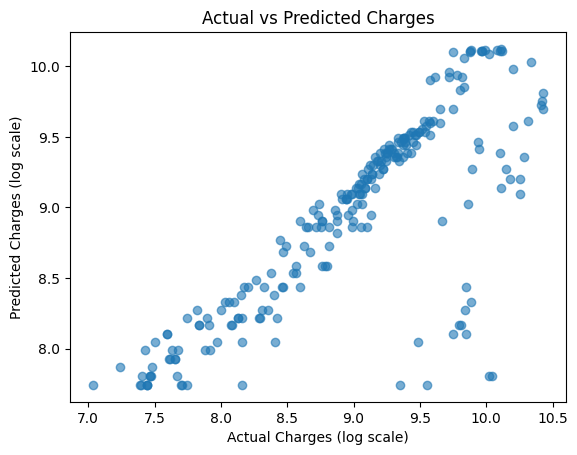

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import skew


# Load dataset
df = pd.read_csv("/content/insurance.csv")

# Encode smoker (yes=1, no=0)
le = LabelEncoder()
df['smoker_encoded'] = le.fit_transform(df['smoker'])

# ---------------- OUTLIER REMOVAL ----------------
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in ['charges', 'bmi', 'age']:
    df = remove_outliers_iqr(df, col)

# ---------------- FEATURE SELECTION ----------------
corr = df.corr(numeric_only=True)
print("Correlation with Charges:\n", corr['charges'].sort_values(ascending=False))

# Keep only features highly correlated with charges
selected_features = corr['charges'][abs(corr['charges']) > 0.3].index.tolist()
selected_features.remove('charges')  # remove target itself
print("Selected features:", selected_features)

# ---------------- TARGET TRANSFORMATION ----------------
if abs(skew(df['charges'])) > 0.5:
    df['charges'] = np.log1p(df['charges'])  # log(1+x) to avoid log(0)

# ---------------- SCALING ----------------
X = df[selected_features]
y = df['charges']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------- POLYNOMIAL FEATURES ----------------
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# ---------------- TRAIN-TEST SPLIT ----------------
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# ---------------- MODEL TRAINING ----------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------- EVALUATION ----------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# ---------------- PLOT ACTUAL vs PREDICTED ----------------
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges (log scale)")
plt.ylabel("Predicted Charges (log scale)")
plt.title("Actual vs Predicted Charges")
plt.show()



# **Explanation**

This program predicts medical insurance charges using a regression model.
It cleans the data by removing outliers and encoding the “smoker” column into numeric form.
It selects only features strongly correlated with charges — here, age and smoker status.
It log-transforms the target (charges) to reduce skewness and scales the features.
It trains a polynomial regression model and evaluates it on a test set.
The R² score 0.632 means the model explains about 63% of the variation in charges

**Evaluate model performance using MAE and RMSE.**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# ---------------- EVALUATION ----------------
y_pred = model.predict(X_test)

# R² Score
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

R² Score: 0.631930318447684
Mean Absolute Error (MAE): 0.28065197605210684
Root Mean Squared Error (RMSE): 0.48361544459184164


# **Explanation:**

This program measures how well the regression model predicts charges.
R² Score checks how much of the variation in actual charges the model explains.
MAE (0.281) means, on average, predictions differ from actual log-scaled charges by 0.281 units.
RMSE (0.484) penalizes larger errors more and shows the typical size of prediction errors.
Lower MAE and RMSE mean better predictions — here, errors are fairly small in log scale.